#### Tarea5 Proyecto de análisis de datos
#### **Leydi Tamara Ariza Cabrejo**
#### **Oscar Mejia Mayorga**
#### Grupo: 203008067_41
#### Tutor: Rafael Gaitan
#### Universidad Nacional Abierta y a Distancia
#### Escuela de ciencias Básicas tecnología e Ingeniería
#### Curso: Machine Learning

####  **Aplicación algoritmo no supervisado**
#### Clustering K-Means

In [2]:
# Importar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
#Importar dataset 
data = pd.read_csv("Anexo 1 - Attrition.csv")
#leer los datos
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


#### **Paso 1 Limpieza de Datos**

In [8]:
# Verificar si hay valores faltantes
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
# Eliminar columnas no relevantes para el clustering (si las hay, como 'EmployeeNumber', 'EmployeeCount', etc.)
data_clean = data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'])

In [12]:
# Convertir variables categóricas a variables numéricas usando One-Hot Encoding
data_clean = pd.get_dummies(data_clean, drop_first=True)

In [24]:
# Verificación de datos después de la limpieza
data_clean.head(10)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False
5,32,1005,2,2,4,79,3,1,4,3068,...,True,False,False,False,False,False,False,False,True,False
6,59,1324,3,3,3,81,4,1,1,2670,...,True,False,False,False,False,False,False,True,False,True
7,30,1358,24,1,4,67,3,1,3,2693,...,True,False,False,False,False,False,False,False,False,False
8,38,216,23,3,4,44,2,3,3,9526,...,False,False,True,False,False,False,False,False,True,False
9,36,1299,27,3,3,94,3,2,3,5237,...,False,False,False,False,False,False,False,True,False,False


In [28]:
# Normalizar las variables numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

#### **Paso 2 Descripción de los varibales**

Numéricas: Age, DailyRate, DistanceFromHome, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, etc.

Categóricas: Attrition, BusinessTravel, Department, EducationField, etc.
Estas variables serán las más importantes para agrupar a los empleados en clústeres. 
Las variables categóricas se convierten en variables binarias (dummy variables) mediante el One-Hot Encoding.

#### **Paso 3 Aplicación de K-means**

In [36]:
# Método del codo para determinar el número óptimo de clústeres
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

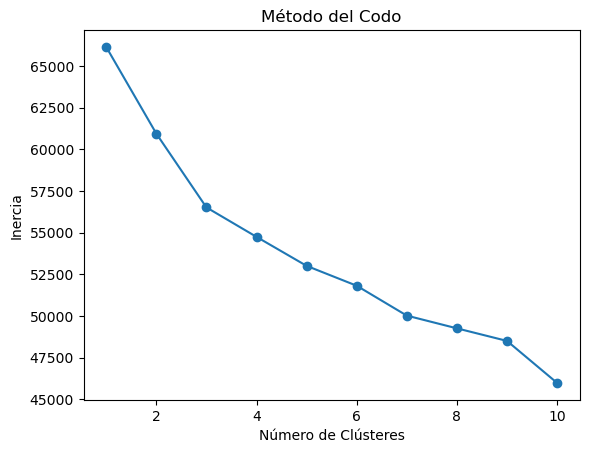

In [40]:
# Graficar el codo
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

#### El número de clústeres optimo son 4.

In [43]:
# Aplicar K-means con el número de clústeres elegido
kmeans = KMeans(n_clusters=4, random_state=42)
data_clean['Cluster'] = kmeans.fit_predict(data_scaled)

# Ver los primeros registros con el clúster asignado
data_clean.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Cluster
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,True,False,False,True,True,1
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,True,False,False,True,False,False,0
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,False,False,True,True,0
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,True,False,False,True,False,True,0
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,False,False,True,False,False,0


#### Paso 5 Establecer Perfiles por Clúster

In [46]:
# Crear perfiles para cada clúster
cluster_profiles = data_clean.groupby('Cluster').mean()

# Mostrar los perfiles de los clústeres
print(cluster_profiles)


               Age   DailyRate  DistanceFromHome  Education  \
Cluster                                                       
0        34.976593  805.248375          9.256177   2.858257   
1        35.150376  800.052632          9.388471   2.912281   
2        46.040000  807.140000          8.896000   3.088000   
3        35.500000  757.923077          8.173077   2.884615   

         EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Cluster                                                                  
0                       2.752926   66.390117        2.752926  1.512354   
1                       2.679198   65.192982        2.696742  2.035088   
2                       2.720000   65.828000        2.716000  3.928000   
3                       2.596154   64.173077        2.711538  1.480769   

         JobSatisfaction  MonthlyIncome  ...  JobRole_Laboratory Technician  \
Cluster                                  ...                                  
0               2.

#### Paso 6 Visualización de los Clústeres

In [53]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2D usando Análisis de Componentes Principales
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [55]:
# Crear un DataFrame con las dos primeras componentes principales y los clústeres
df_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = data_clean['Cluster']

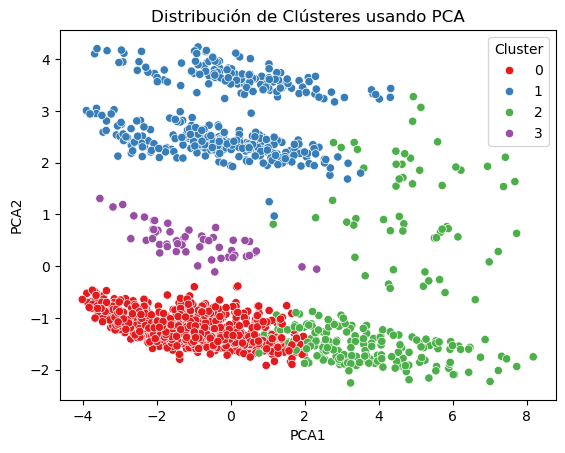

In [59]:
# Graficar los clústeres
import seaborn as sns
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1')
plt.title('Distribución de Clústeres usando PCA')
plt.show()

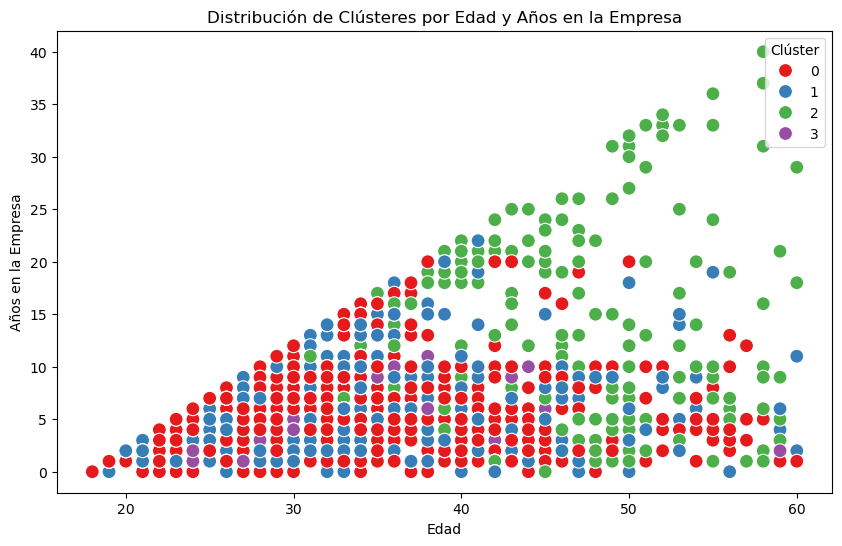

In [61]:
# Gráfico de distribución de los clústeres por 'Age' y 'YearsAtCompany'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='YearsAtCompany', hue='Cluster', data=data_clean, palette='Set1', s=100)
plt.title('Distribución de Clústeres por Edad y Años en la Empresa')
plt.xlabel('Edad')
plt.ylabel('Años en la Empresa')
plt.legend(title='Clúster')
plt.show()

C:\Users\zxdma\AppData\Local\Temp\ipykernel_16100\1223874899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='DailyRate', data=data_clean, palette='Set1')


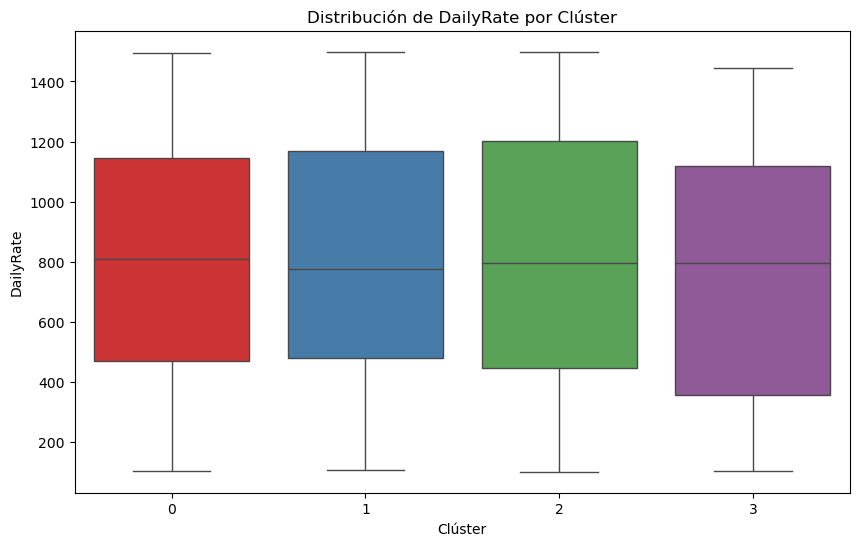

In [63]:
# Boxplot de 'DailyRate' por clúster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='DailyRate', data=data_clean, palette='Set1')
plt.title('Distribución de DailyRate por Clúster')
plt.xlabel('Clúster')
plt.ylabel('DailyRate')
plt.show()